In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


books = pd.read_csv("./resources/Books.csv")



books

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,3.87,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",NaN,5.228,4.697778,https://www.goodreads.com/book/show/244261.The...
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,4.13,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,6.442222,https://www.goodreads.com/book/show/4645.The_S...
993,993,Riddley Walker,Russell Hoban,7075,819,4.02,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,5.704444,https://www.goodreads.com/book/show/428.Play_I...
994,994,Play It As It Lays,Joan Didion,29879,2278,3.88,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",NaN,5.289,4.764444,https://www.goodreads.com/book/show/776573.Rid...


In [15]:
max_rating = books['Rating Value'].max()
min_rating = books['Rating Value'].min()
range_of_ratings = max_rating - min_rating

books['minmax_norm_ratings'] = round(1 + 9*((books['Rating Value'] - min_rating)/range_of_ratings) , 3)

mean_rating = books['Rating Value'].mean()

books['mean_norm_ratings'] = round(1 + 9*((books['Rating Value'] - mean_rating)/range_of_ratings) , 3)

In [16]:
dr = books[["Title", "1st Pub", 'minmax_norm_ratings']]
dr

,Title,1st Pub,minmax_norm_ratings
0,To Kill a Mockingbird,1960.0,7.705
1,1984,1949.0,7.161
2,The Great Gatsby,1925.0,5.591
3,Harry Potter and the Sorcerer's Stone,1997.0,8.913
4,"The Hobbit, or There and Back Again",1937.0,7.705
...,...,...,...
991,The Snows of Kilimanjaro and Other Stories,1961.0,5.228
992,The Street of Crocodiles,1933.0,6.799
993,Riddley Walker,1980.0,6.134
994,Play It As It Lays,1970.0,5.289


In [17]:
print(books['minmax_norm_ratings'])

0      7.705
1      7.161
2      5.591
3      8.913
4      7.705
       ...  
991    5.228
992    6.799
993    6.134
994    5.289
995    6.376
Name: minmax_norm_ratings, Length: 996, dtype: float64


In [18]:
dyear = dr.groupby("1st Pub").agg({"minmax_norm_ratings": [lambda x: np.mean(x)]})
dyear.columns = ["Mean of norm ratings"]

dyear['publishing year'] = dyear.index

#dyear = dyear.style.hide_index()

dyear = dyear.reset_index(drop=True)

#books['1st Pub'] = books['1st Pub'].astype(int)

dyear

,Mean of norm ratings,publishing year
0,3.718000,1900.0
1,6.134333,1901.0
2,6.557000,1902.0
3,6.517000,1903.0
4,5.167500,1904.0
...,...,...
97,6.169955,1998.0
98,6.220476,1999.0
99,6.299579,2000.0
100,4.564000,2001.0


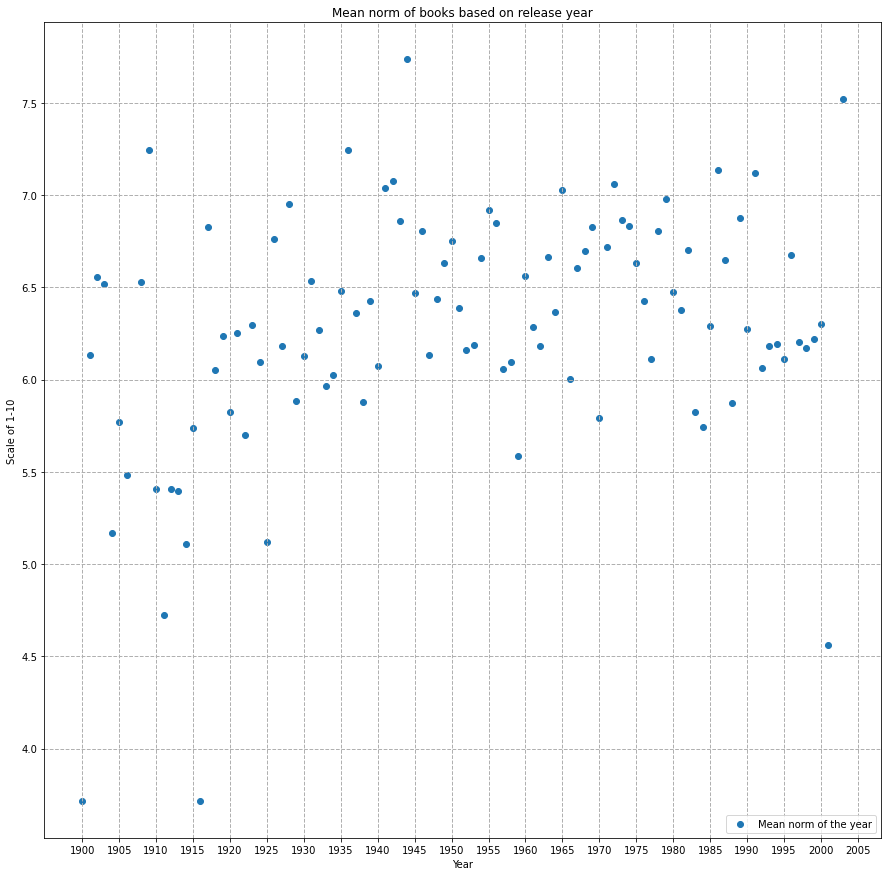

In [19]:
#pubyear = dr["1st Pub"].tolist()
#meannorm = books['minmax_norm_ratings'].tolist()


pubyear = dyear["publishing year"].tolist()
meannorm = dyear["Mean of norm ratings"].tolist()


plt.figure(figsize = (15,15))
plt.scatter(pubyear, meannorm, label = "Mean norm of the year")
plt.xlabel('Year')
plt.ylabel('Scale of 1-10')
plt.legend(loc='lower right')
plt.title('Mean norm of books based on release year')
plt.grid(True, linewidth= 1, linestyle="--")

plt.xticks(np.arange(1900, 2010, step=5))


plt.savefig('nameoftheplot.jpg')

plt.show()

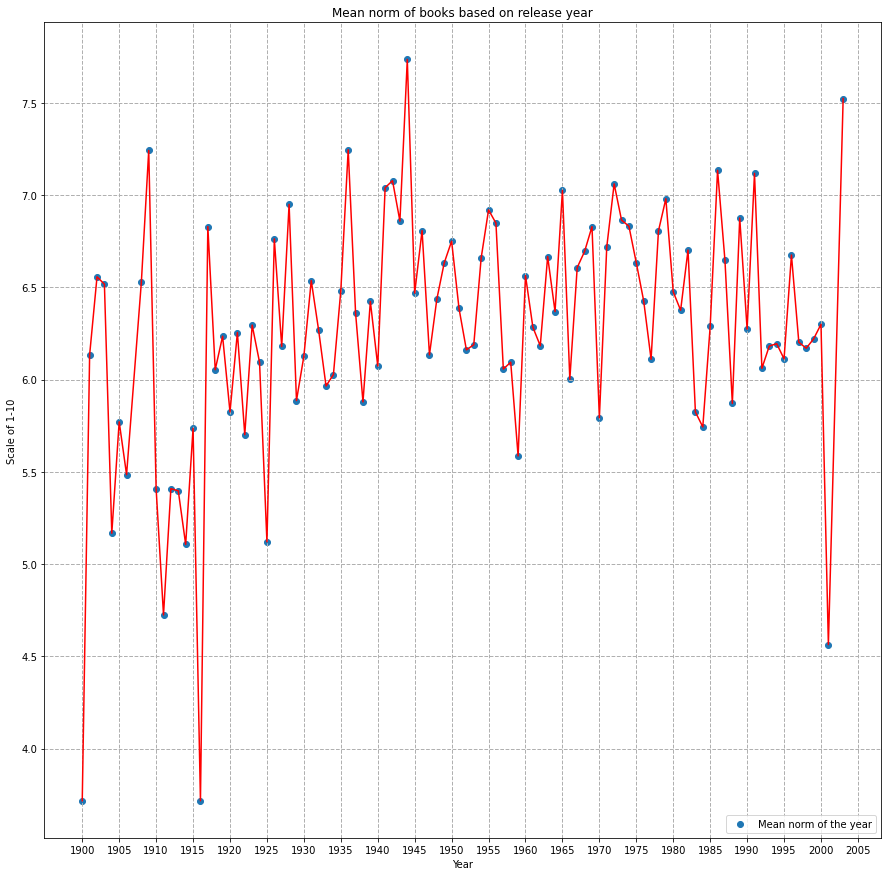

In [20]:
pubyear = dyear["publishing year"].tolist()
meannorm = dyear["Mean of norm ratings"].tolist()


plt.figure(figsize = (15,15))
plt.scatter(pubyear, meannorm, label = "Mean norm of the year")
plt.plot(pubyear, meannorm, color='red')
plt.xlabel('Year')
plt.ylabel('Scale of 1-10')
plt.legend(loc='lower right')
plt.title('Mean norm of books based on release year')
plt.grid(True, linewidth= 1, linestyle="--")

plt.xticks(np.arange(1900, 2010, step=5))

plt.savefig('nameoftheplot2.jpg')

plt.show()

In [76]:
import scipy.stats as st
import statsmodels as sm
import seaborn

avg_rating = books["Rating Value"].tolist()
minmax_norm_rating = books["minmax_norm_ratings"].tolist()
mean_norm_rating = books["mean_norm_ratings"].tolist()




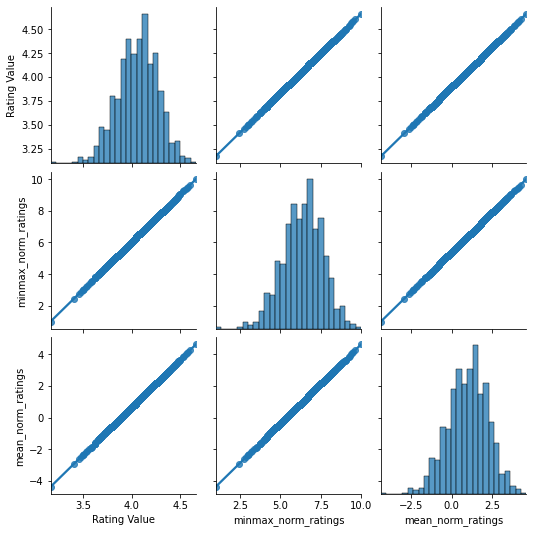

In [30]:
seaborn.pairplot(books, vars=('Rating Value', 'minmax_norm_ratings', 'mean_norm_ratings'), kind='reg')

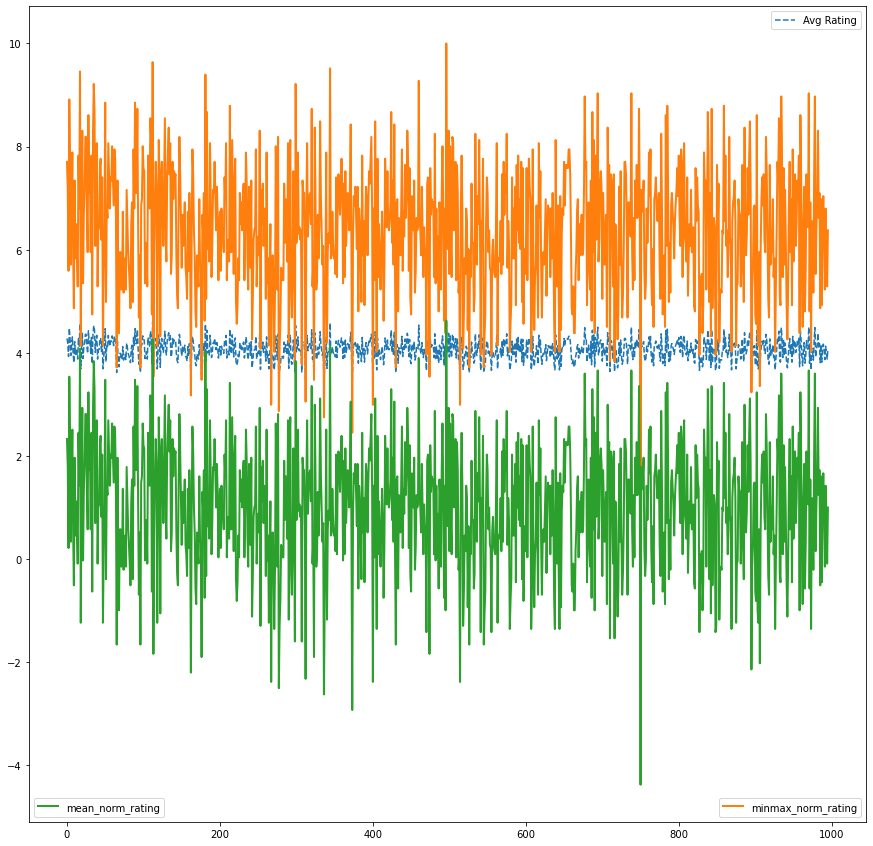

In [71]:


line1, = plt.plot(avg_rating, label="Avg Rating", linestyle='--')
line2, = plt.plot(minmax_norm_rating, label="minmax_norm_rating", linewidth=2)
line3, = plt.plot(mean_norm_rating, label="mean_norm_rating", linewidth=2)


first_legend = plt.legend(handles=[line1], loc='upper right')
second_legend = plt.legend(handles=[line2], loc='lower right')

ax = plt.gca().add_artist(first_legend)
ay = plt.gca().add_artist(second_legend)
plt.legend(handles=[line3], loc='lower left')

plt.show()

(array([  1.,   2.,  12.,  65., 154., 257., 272., 178.,  47.,   8.]),
 array([-4.374, -3.474, -2.574, -1.674, -0.774,  0.126,  1.026,  1.926,
         2.826,  3.726,  4.626]),
 <BarContainer object of 10 artists>)

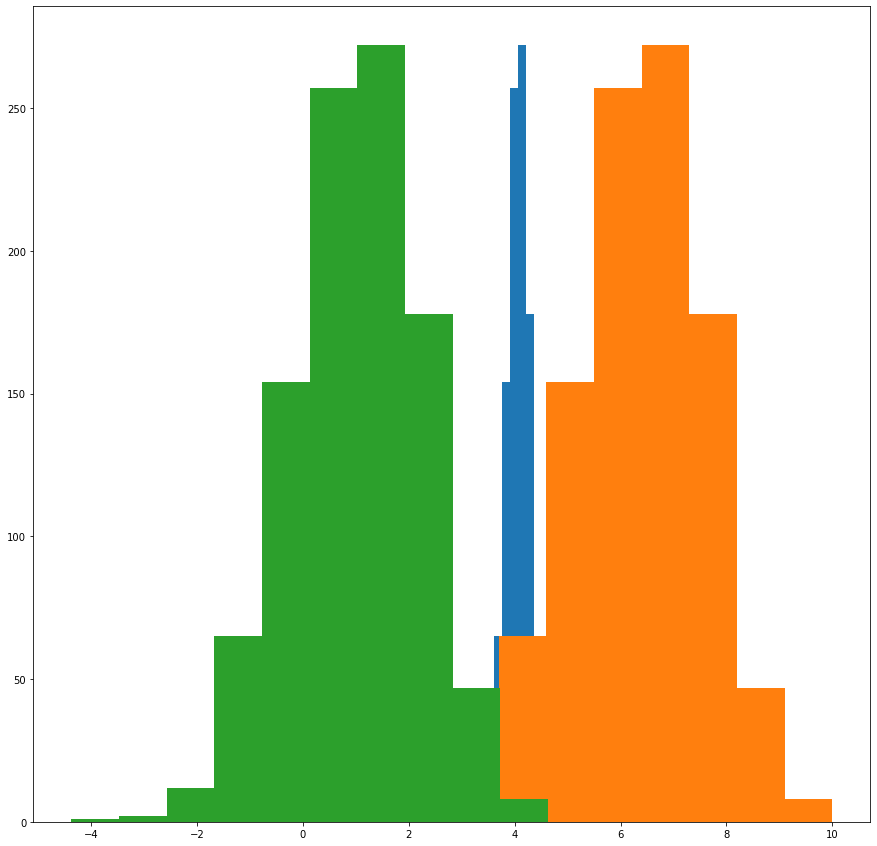

In [72]:

plt.figure(figsize = (15,15))
plt.hist(avg_rating)
plt.hist(minmax_norm_rating)
plt.hist(mean_norm_rating)

In [80]:
import scipy.stats as st
import statsmodels as sm

st.stats.chisquare(books["Rating Value"])

Power_divergenceResult(statistic=10.251775442067517, pvalue=1.0)